In [1]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input, LSTM, RepeatVector
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO

In [ ]:
df = pd.read_csv('/content/pamap2_HAR_raw.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_1,IMU_hand_3D_acceleration_2,IMU_hand_3D_acceleration_3,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_gyroscope_1,...,IMU_ankle_3D_gyroscope_3,IMU_ankle_3D_magnetometer_1,IMU_ankle_3D_magnetometer_2,IMU_ankle_3D_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,activityID,activity_name
0,0.00,2.0,3.000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000,10.000000,...,46.000000,47.0000,48.0000,49.0000,50.0,51.0,52.0,53.0,1,Lying
1,37.66,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,...,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1,Lying
2,37.67,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,...,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1,Lying
3,37.68,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,...,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1,Lying
4,37.69,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,...,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1,Lying


In [4]:
df.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_1,IMU_hand_3D_acceleration_2,IMU_hand_3D_acceleration_3,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_gyroscope_1,...,IMU_ankle_3D_gyroscope_2,IMU_ankle_3D_gyroscope_3,IMU_ankle_3D_magnetometer_1,IMU_ankle_3D_magnetometer_2,IMU_ankle_3D_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,activityID
count,25000.000000,2287.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,...,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,25000.0
mean,162.643494,87.945343,31.233926,4.443440,2.474244,3.631801,4.480034,2.468255,3.769476,0.007949,...,-0.002106,0.011478,-19.588359,36.317452,1.904401,1.001960,0.002040,0.002080,0.002120,1.0
std,72.173228,7.520639,0.439316,3.094593,3.747164,5.785013,3.120743,3.739146,5.843022,0.271120,...,0.301210,0.334469,9.684293,18.850296,21.189988,0.309922,0.322572,0.328897,0.335222,0.0
min,0.000000,2.000000,3.000000,-14.090400,-9.313420,-15.184400,-14.050700,-9.329430,-14.993400,-3.250640,...,-1.152890,-1.024640,-117.268000,-57.557200,-60.519300,1.000000,0.000000,0.000000,0.000000,1.0
25%,100.147500,82.000000,30.937500,1.247890,1.228200,5.150830,1.287700,1.254490,5.281970,-0.018436,...,-0.021684,-0.009583,-20.217600,37.807600,-6.018060,1.000000,0.000000,0.000000,0.000000,1.0
50%,162.645000,86.000000,31.312500,5.976940,1.912230,6.261090,6.032940,1.845810,6.597490,0.001184,...,-0.005120,0.002438,-18.985400,44.322300,-2.516010,1.000000,0.000000,0.000000,0.000000,1.0
75%,225.142500,91.000000,31.562500,7.145550,5.623690,6.532970,7.228940,5.669150,6.748510,0.021286,...,0.011920,0.014430,-14.336900,44.852400,0.324129,1.000000,0.000000,0.000000,0.000000,1.0
max,287.640000,107.000000,31.875000,11.707600,13.514400,10.436800,11.751600,13.375300,10.442800,10.000000,...,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,1.0


In [5]:
sensor_columns = [col for col in df.columns if col not in ['timestamp', 'activityID', 'activity_name']]
sensor_data = df[sensor_columns]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Linear Interpolation, Feature Engineering and Dropping NANs
sensor_data = sensor_data.interpolate(method='linear', axis=0)
sensor_data = sensor_data.dropna()

sensor_data['hand_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_1']**2 +
    sensor_data['IMU_hand_3D_acceleration_2']**2 +
    sensor_data['IMU_hand_3D_acceleration_3']**2
)
sensor_data['chest_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_1']**2 +
    sensor_data['IMU_chest_3D_acceleration_2']**2 +
    sensor_data['IMU_chest_3D_acceleration_3']**2
)
sensor_data['chest_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_gyroscope_1']**2 +
    sensor_data['IMU_chest_3D_gyroscope_2']**2 +
    sensor_data['IMU_chest_3D_gyroscope_3']**2
)
sensor_data['chest_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_magnetometer_1']**2 +
    sensor_data['IMU_chest_3D_magnetometer_2']**2 +
    sensor_data['IMU_chest_3D_magnetometer_3']**2
)
sensor_data['ankle_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_1']**2 +
    sensor_data['IMU_ankle_3D_acceleration_2']**2 +
    sensor_data['IMU_ankle_3D_acceleration_3']**2
)
sensor_data['ankle_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_gyroscope_1']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_2']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_3']**2
)
sensor_data['ankle_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_magnetometer_1']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_2']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_3']**2
)
sensor_data['hand_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_4']**2 +
    sensor_data['IMU_hand_3D_acceleration_5']**2 +
    sensor_data['IMU_hand_3D_acceleration_6']**2
)
sensor_data['hand_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_gyroscope_1']**2 +
    sensor_data['IMU_hand_3D_gyroscope_2']**2 +
    sensor_data['IMU_hand_3D_gyroscope_3']**2
)
sensor_data['hand_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_magnetometer_1']**2 +
    sensor_data['IMU_hand_3D_magnetometer_2']**2 +
    sensor_data['IMU_hand_3D_magnetometer_3']**2
)
sensor_data['chest_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_4']**2 +
    sensor_data['IMU_chest_3D_acceleration_5']**2 +
    sensor_data['IMU_chest_3D_acceleration_6']**2
)
sensor_data['ankle_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_4']**2 +
    sensor_data['IMU_ankle_3D_acceleration_5']**2 +
    sensor_data['IMU_ankle_3D_acceleration_6']**2
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
cols_to_drop = [
    'IMU_chest_3D_acceleration_1','IMU_chest_3D_acceleration_2','IMU_chest_3D_acceleration_3',
    'IMU_chest_3D_acceleration_4','IMU_chest_3D_acceleration_5','IMU_chest_3D_acceleration_6',
    'IMU_hand_3D_acceleration_1','IMU_hand_3D_acceleration_2','IMU_hand_3D_acceleration_3',
    'IMU_hand_3D_acceleration_4','IMU_hand_3D_acceleration_5','IMU_hand_3D_acceleration_6',
    'IMU_chest_3D_gyroscope_1','IMU_chest_3D_gyroscope_2','IMU_chest_3D_gyroscope_3',
    'IMU_hand_3D_gyroscope_1','IMU_hand_3D_gyroscope_2','IMU_hand_3D_gyroscope_3',
    'IMU_chest_3D_magnetometer_1','IMU_chest_3D_magnetometer_2','IMU_chest_3D_magnetometer_3',
    'IMU_ankle_3D_acceleration_1','IMU_ankle_3D_acceleration_2','IMU_ankle_3D_acceleration_3',
    'IMU_ankle_3D_acceleration_4','IMU_ankle_3D_acceleration_5','IMU_ankle_3D_acceleration_6',
    'IMU_ankle_3D_gyroscope_1','IMU_ankle_3D_gyroscope_2','IMU_ankle_3D_gyroscope_3',
    'IMU_ankle_3D_magnetometer_1','IMU_ankle_3D_magnetometer_2','IMU_ankle_3D_magnetometer_3',
    'IMU_hand_3D_magnetometer_1','IMU_hand_3D_magnetometer_2','IMU_hand_3D_magnetometer_3'
]
sensor_data = sensor_data.drop(cols_to_drop, axis=1)

scaler = MinMaxScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)
sensor_data_scaled = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns)

sensor_data_scaled['timestamp'] = df['timestamp']
sensor_data_scaled['activityID'] = df['activityID']
sensor_data_scaled['activity_name'] = df['activity_name']

threshold_time = df['timestamp'].quantile(0.8)
support_set = sensor_data_scaled[sensor_data_scaled['timestamp'] < threshold_time]
query_set = sensor_data_scaled[sensor_data_scaled['timestamp'] >= threshold_time]

def drop_id_columns(df_):
    return df_.drop(['timestamp','activityID','activity_name'], axis=1)

support_features = drop_id_columns(support_set)
query_features = drop_id_columns(query_set)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
sensor_data_scaled.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,heart_rate,IMU_hand_temperature,IMU_hand_orientation_1,IMU_hand_orientation_2,IMU_hand_orientation_3,IMU_hand_orientation_4,IMU_chest_temperature,IMU_chest_orientation_1,IMU_chest_orientation_2,IMU_chest_orientation_3,...,ankle_gyro_magnitude,ankle_mag_magnitude,hand_acc_magnitude_4_6,hand_gyro_magnitude,hand_mag_magnitude,chest_acc_magnitude_4_6,ankle_acc_magnitude_4_6,timestamp,activityID,activity_name
0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,...,1.000000,0.462071,0.757298,1.000000,0.000000,1.000000,1.000000,0.00,1,Lying
1,0.186667,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000345,0.571266,0.473347,0.002001,0.992089,0.100956,0.053396,37.66,1,Lying
2,0.373333,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000266,0.566892,0.446982,0.009035,1.000000,0.101751,0.052682,37.67,1,Lying
3,0.560000,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000801,0.561847,0.414937,0.012419,0.979029,0.102318,0.052919,37.68,1,Lying
4,0.746667,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000580,0.565944,0.392313,0.010106,0.988483,0.102108,0.052794,37.69,1,Lying


In [9]:
sensor_data_scaled.describe()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,heart_rate,IMU_hand_temperature,IMU_hand_orientation_1,IMU_hand_orientation_2,IMU_hand_orientation_3,IMU_hand_orientation_4,IMU_chest_temperature,IMU_chest_orientation_1,IMU_chest_orientation_2,IMU_chest_orientation_3,...,ankle_acc_magnitude,ankle_gyro_magnitude,ankle_mag_magnitude,hand_acc_magnitude_4_6,hand_gyro_magnitude,hand_mag_magnitude,chest_acc_magnitude_4_6,ankle_acc_magnitude_4_6,timestamp,activityID
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0
mean,0.818783,0.977799,0.000040,0.000040,0.000040,0.000040,0.956248,0.000040,0.000040,0.000040,...,0.052428,0.001122,0.063977,0.417909,0.008524,0.744718,0.100168,0.054715,162.643494,1.0
std,0.069914,0.015214,0.006325,0.006325,0.006325,0.006325,0.029401,0.006325,0.006325,0.006325,...,0.008933,0.007035,0.112652,0.033672,0.024525,0.083075,0.008500,0.008291,72.173228,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.761905,0.967532,0.000000,0.000000,0.000000,0.000000,0.931193,0.000000,0.000000,0.000000,...,0.051233,0.000310,0.032029,0.412914,0.001254,0.714116,0.098363,0.054084,100.147500,1.0
50%,0.800000,0.980519,0.000000,0.000000,0.000000,0.000000,0.958716,0.000000,0.000000,0.000000,...,0.052464,0.000451,0.039013,0.416667,0.001850,0.757287,0.100201,0.054670,162.645000,1.0
75%,0.847619,0.989177,0.000000,0.000000,0.000000,0.000000,0.981651,0.000000,0.000000,0.000000,...,0.053445,0.000633,0.049515,0.421496,0.002762,0.801568,0.101675,0.055153,225.142500,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,287.640000,1.0


In [10]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length].values)
    return np.array(sequences)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LSTM-Autoencoder (Point Anomaly Detection)

In [ ]:
seq_length_short = 50
sensor_data_scaled_first_10000 = sensor_data_scaled.drop(['timestamp','activityID','activity_name'], axis=1)
X_seq_all = create_sequences(sensor_data_scaled_first_10000, seq_length_short)

input_dim = X_seq_all.shape[2]
timesteps = X_seq_all.shape[1]
encoding_dim = 32

input_layer = Input(shape=(timesteps, input_dim))
encoded = LSTM(encoding_dim, activation='relu', return_sequences=False)(input_layer)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, activation='sigmoid', return_sequences=True)(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_seq_all, X_seq_all, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 0.0245 - val_loss: 4.3398e-04
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - loss: 5.3922e-04 - val_loss: 3.7149e-04
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - loss: 4.6359e-04 - val_loss: 2.8364e-04
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - loss: 3.9777e-04 - val_loss: 2.5901e-04
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - loss: 3.7672e-04 - val_loss: 2.0527e-04
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 46s 56ms/step - loss: 3.5386e-04 - val_loss: 2.0337e-04
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - loss: 3.4565e-04 - val_loss: 2.0099e-04
Epoch 8/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - loss: 3.2023e-04 - val_loss: 2.2181e-04
Epoch 9/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 3.1969e-04 - val_loss: 1.9891e-04
Epoch 10/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - loss: 3.0955e-04 - val_loss: 1.8623e-04
Epoch 11/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 45

In [ ]:
#Obtain reconstruction error for all sequences
X_pred_all = autoencoder.predict(X_seq_all)
reconstruction_error_all = np.mean(np.abs(X_pred_all - X_seq_all), axis=(1, 2))
threshold_all = np.percentile(reconstruction_error_all, 95)
anomalies_all = reconstruction_error_all > threshold_all
print(f"Total anomalies (point detection): {np.sum(anomalies_all)}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


780/780 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step
Total anomalies (point detection): 1248


# LSTM & Transformer Autoencoders for Sequential & Periodic Context

In [ ]:
# Sequential pass using LSTM on support and query sets
X_seq_support_lstm = create_sequences(support_features, seq_length_short)
X_seq_query_lstm = create_sequences(query_features, seq_length_short)

input_dim_lstm = X_seq_support_lstm.shape[2]
timesteps_lstm = X_seq_support_lstm.shape[1]

input_layer_lstm = Input(shape=(timesteps_lstm, input_dim_lstm))
encoded_lstm = LSTM(encoding_dim, activation='relu', return_sequences=False)(input_layer_lstm)
decoded_lstm = RepeatVector(timesteps_lstm)(encoded_lstm)
decoded_lstm = LSTM(input_dim_lstm, activation='sigmoid', return_sequences=True)(decoded_lstm)
autoencoder_lstm = Model(input_layer_lstm, decoded_lstm)
autoencoder_lstm.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_lstm.fit(X_seq_support_lstm, X_seq_support_lstm, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 35s 60ms/step - loss: 0.0282 - val_loss: 0.0011
Epoch 2/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 4.8293e-04 - val_loss: 6.3222e-04
Epoch 3/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 4.3790e-04 - val_loss: 8.6228e-04
Epoch 4/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 3.5601e-04 - val_loss: 0.0011
Epoch 5/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 45s 59ms/step - loss: 3.3750e-04 - val_loss: 8.9600e-04
Epoch 6/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - loss: 3.2366e-04 - val_loss: 9.9969e-04
Epoch 7/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 3.1198e-04 - val_loss: 0.0011
Epoch 8/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - loss: 3.1064e-04 - val_loss: 6.9902e-04
Epoch 9/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - loss: 2.9476e-04 - val_loss: 6.5877e-04
Epoch 10/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - loss: 4.6022e-04 - val_loss: 7.6464e-04
Epoch 11/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step 

In [14]:
X_seq_query_pred_lstm = autoencoder_lstm.predict(X_seq_query_lstm)
reconstruction_error_lstm = np.mean(np.abs(X_seq_query_pred_lstm - X_seq_query_lstm), axis=(1, 2))
threshold_lstm = np.percentile(reconstruction_error_lstm, 95)
anomalies_lstm = reconstruction_error_lstm > threshold_lstm
print(f"Anomalies (LSTM, short window, query set): {np.sum(anomalies_lstm)}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
Anomalies (LSTM, short window, query set): 248


In [15]:
# Periodic pass using a Transformer autoencoder
seq_length_long = 100
def create_sequences_long(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length].values)
    return np.array(sequences)

X_seq_support_transformer = create_sequences_long(support_features, seq_length_long)
X_seq_query_transformer = create_sequences_long(query_features, seq_length_long)

In [16]:
def build_transformer_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    encoder = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    encoder = layers.LayerNormalization()(encoder)
    encoder = layers.GlobalAveragePooling1D()(encoder)
    decoder = layers.RepeatVector(input_shape[0])(encoder)
    decoder = layers.LSTM(128, return_sequences=True)(decoder)
    decoder = layers.Dense(input_shape[1], activation='linear')(decoder)
    model = tf.keras.Model(inputs, decoder)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

input_shape_transformer = (seq_length_long, X_seq_support_transformer.shape[2])
transformer_model = build_transformer_autoencoder(input_shape_transformer)
transformer_model.fit(X_seq_support_transformer, X_seq_support_transformer, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 123s 473ms/step - loss: 0.0134 - val_loss: 9.3952e-04
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 133s 534ms/step - loss: 4.8350e-04 - val_loss: 5.8874e-04
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 138s 516ms/step - loss: 2.5216e-04 - val_loss: 4.2811e-04
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 139s 503ms/step - loss: 1.9675e-04 - val_loss: 4.1397e-04
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 131s 461ms/step - loss: 1.7158e-04 - val_loss: 3.7397e-04
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 145s 471ms/step - loss: 1.7131e-04 - val_loss: 3.6196e-04
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 144s 479ms/step - loss: 1.6685e-04 - val_loss: 3.6620e-04
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 145s 493ms/step - loss: 1.7384e-04 - val_loss: 3.7713e-04
Epoch 9/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 122s 490ms/step - loss: 1.6205e-04 - val_loss: 3.6592e-04
Epoch 10/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 153s 536ms/step - loss: 1.6309e-04 - val_loss: 3.4070e-04
Epoch 11/20
249/249 ━━━

In [17]:
X_seq_query_pred_transformer = transformer_model.predict(X_seq_query_transformer)
reconstruction_error_transformer = np.mean(np.abs(X_seq_query_pred_transformer - X_seq_query_transformer), axis=(1, 2))
threshold_transformer = np.percentile(reconstruction_error_transformer, 95)
anomalies_transformer = reconstruction_error_transformer > threshold_transformer
print(f"Anomalies (Transformer, long window, query set): {np.sum(anomalies_transformer)}")

154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step
Anomalies (Transformer, long window, query set): 245


In [ ]:
# Aggregation of Anomaly Scores
min_len = min(len(reconstruction_error_lstm), len(reconstruction_error_transformer))
combined_reconstruction_error = reconstruction_error_lstm[:min_len] + reconstruction_error_transformer[:min_len]
combined_reconstruction_error_normalized = (combined_reconstruction_error - np.min(combined_reconstruction_error)) / (np.max(combined_reconstruction_error) - np.min(combined_reconstruction_error))
combined_threshold = 0.8  # 80% threshold for combined result
final_anomalies = combined_reconstruction_error_normalized > combined_threshold
print(f"Final anomalies after aggregation: {np.sum(final_anomalies)}")

# For DRL training we derive a binary label for each timestep in the query set (using the combined window)
final_labels = final_anomalies.astype(np.int32)

Final anomalies after aggregation: 1210


# DRL-based Anomaly Detection

In [ ]:
class AnomalyDetectionEnv(gym.Env):
    def __init__(self, errors, labels):
        super(AnomalyDetectionEnv, self).__init__()
        self.errors = errors
        self.labels = labels  
        self.current_idx = 0
        self.observation_space = spaces.Box(low=0.0, high=1.0, shape=(1,), dtype=np.float32)
        self.action_space = spaces.Discrete(2)

    def reset(self):
        self.current_idx = 0
        return np.array([self.errors[self.current_idx]], dtype=np.float32)

    def step(self, action):
        true_label = self.labels[self.current_idx]
        # Reward +1 for correct classification, -1 for misclassification
        reward = 1.0 if action == true_label else -1.0
        self.current_idx += 1
        done = self.current_idx >= len(self.errors)
        if not done:
            obs = np.array([self.errors[self.current_idx]], dtype=np.float32)
        else:
            obs = np.array([0.0], dtype=np.float32)
        return obs, reward, done, {}

In [ ]:
env = AnomalyDetectionEnv(combined_reconstruction_error_normalized[:min_len], final_labels)

A2C agent accuracy on anomaly detection: 75.31%


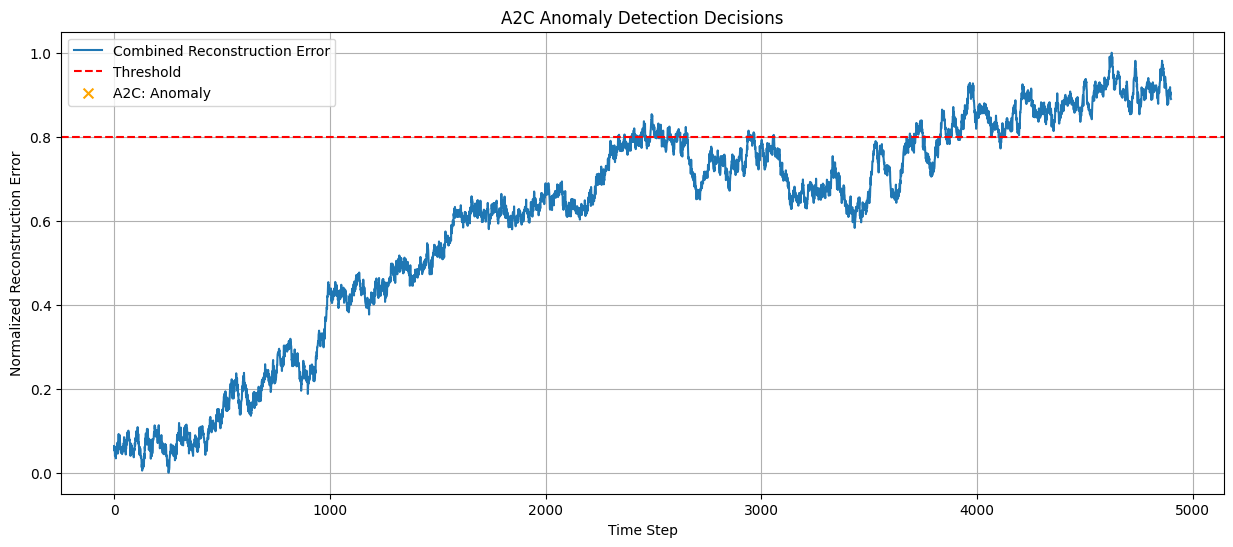

In [ ]:
from stable_baselines3 import A2C

# DRL training with A2C
model = A2C("MlpPolicy", env, verbose=0, learning_rate=1e-3, n_steps=5, gamma=0.99)
model.learn(total_timesteps=15000)

obs = env.reset()
drl_actions = []
while True:
    action, _ = model.predict(obs, deterministic=True)
    drl_actions.append(action)
    obs, _, done, _ = env.step(action)
    if done:
        break

true_labels = final_labels[:len(drl_actions)]
accuracy = np.mean(np.array(drl_actions) == true_labels)
print(f"A2C agent accuracy on anomaly detection: {accuracy*100:.2f}%")

plt.figure(figsize=(15,6))
plt.plot(combined_reconstruction_error_normalized[:min_len], label='Combined Reconstruction Error')
plt.axhline(y=combined_threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(np.where(np.array(drl_actions)==1)[0],
            combined_reconstruction_error_normalized[:min_len][np.array(drl_actions)==1],
            color='orange', marker='x', s=50, label='A2C: Anomaly')
plt.title('A2C Anomaly Detection Decisions')
plt.xlabel('Time Step')
plt.ylabel('Normalized Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()